pour la droite analytique y=k*x +c,le pente k =  0.02898837815220822 et c =  3.805140125273185


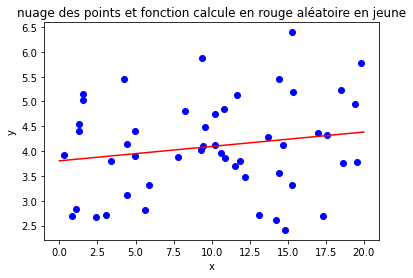

In [8]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = [random.uniform(0, 20)]
y = [random.gauss(4, 1)]

nbpoint = 49
for i in range(nbpoint):
    x_new = random.uniform(0, 20)#distribution de X :uniforme de [0,20]
    y_new = random.gauss(4, 1)#pour y :variance de 4 
    x.append(x_new)
    y.append(y_new)
    
plt.title("nuage des points et fonction calcule en rouge aléatoire en jeune") 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y,'bo')

#calculde la fonction coordonnée avec y=kx+c
sommeXY = 0
sommeX = 0
sommeY = 0
sommeXcarre = 0
for i in range(50):
    sommeXY = sommeXY + x[i]*y[i]

for i in range(50):
    sommeY = sommeY + y[i]    

for i in range(50):
    sommeX = sommeX + x[i]
    
for i in range(50):
    sommeXcarre = sommeXcarre + np.square(x[i])    
    
k = ((50*sommeXY)-(sommeY*sommeX))/((50*sommeXcarre)-np.square(sommeX))
c = ((sommeXcarre*sommeY) - sommeX*sommeXY) /((50*sommeXcarre)-np.square(sommeX))
print("pour la droite analytique y=k*x +c,le pente k = ",k,"et c = " ,c )
#affichage :
xd = np.linspace(0,20)
ycalcul = xd*k+c
#fonction aléatoire y=x*a+b:
a = -0.2
b = 4
yaleatoire = xd*a+b
plt.plot(xd,ycalcul,'r')
#plt.plot(xd,yaleatoire,'y')
plt.show
plt.savefig("nuage.jpg")

In [12]:
#gradient descente:

la droite analytique est :
-0.02933289089326848 * x + 4.455183115642419
avec 100000 fois d'itération


<function matplotlib.pyplot.show(close=None, block=None)>

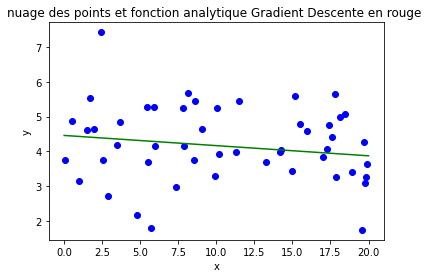

In [13]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = [random.uniform(0, 20)]
y = [random.gauss(4, 1)]

nbpoint = 49
for i in range(nbpoint):
    x_new = random.uniform(0, 20)#distribution de X :uniforme de [0,20]
    y_new = random.gauss(4, 1)#pour y :variance de 4 
    x.append(x_new)
    y.append(y_new)
    
plt.title("nuage des points et fonction analytique Gradient Descente en rouge ") 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y,'bo')

#calculde la fonction coordonnée avec gadient descente
#pas de descendre,on suppose que est 0.01
alpha = 0.01 
#erreur conditionnelle pour arrêter le calcul
eps = 1e-6 
#on commence à calculer avec la méthode gradient descente
m = len(x)
a, b= 0, 0
sse, sse_new = 0, 0
grad_a, grad_b = 0, 0
count = 0
#on le calcule avec 100000 fois d'itération
for step in range(100000):
    count += 1
    for i in range(m):
        base = a * x[i] + b - y[i]
        grad_a += x[i] * base
        grad_b += base

        grad_a = grad_a / m
        grad_b = grad_b / m

        a -= alpha * grad_a
        b -= alpha * grad_b

# fonction objectif : l’erreur quadratique moyenne
#comme m est une valeur constante , ici on nigelige 
#la valeur constante pour calcule la difference
        for j in range(m):
            sse_new += (a * x[j] + b - y[j]) ** 2

    if abs(sse_new - sse) < eps:
        break
    else:
        sse = sse_new

print("la droite analytique est :")        
print('{0} * x + {1}'.format(a, b))
print("avec" , count,"fois d'itération") 
xd = np.linspace(0,20)
yanaGD = xd*a+b
plt.plot(xd,yanaGD,'g')
plt.show

In [14]:
#gradient stochastique 

<function matplotlib.pyplot.show(close=None, block=None)>

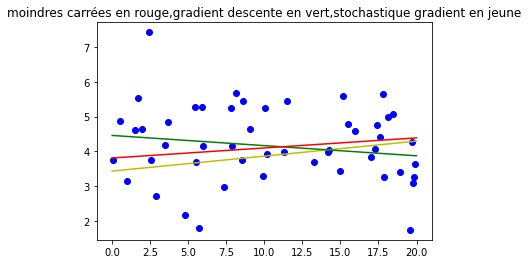

In [31]:
#on suppose que la fonction analytique est y =asg*x+bsg
#ici asg et bsg sont les deux constantes
error0 = 0
error1 = 0
n = 0
m = len(x)
#erreur conditionnelle pour arrêter le calcul
esp = 1e-6
#pas de descendre,on suppose que est 0.01
pas_stogard = 0.01  
#donner une valeur aleatoire à asg et bsg
ags = random.randint(0,10) 
bgs = random.randint(0,10)
while True:
    ilotcomp = []
    for i in range(5):  #creation d'une ilôt de 5 composantes
        ilotcomp.append(random.randint(0,m-1))

#commence à faire le calcul
    for i in range(5):   
        s = ilotcomp[i]
        sum0 = ags*x[s]+bgs-y[s]
        sum1 = (ags*x[s]+bgs-y[s])*x[s]
        error1 = error1+(a*x[s]+b-y[s])**2
    #gradient descend    
    ags = ags - sum1*pas_stogard/m
    bgs = bgs - sum0*pas_stogard/m
    #print('asg=%f,bsg=%f,error=%f'%(asg,bsg,error1))
    if error1-error0<esp:
        break
 
    n = n+1
    #on fait 1000 fois itérations
    if n>1000:
        break

#affichage
plt.plot(x,y,'bo')        
xd = np.linspace(0,20)
yanaGS = xd*ags+bgs
plt.plot(xd,yanaGS,'y')
yanaGD = xd*a+b
plt.plot(xd,yanaGD,'g')
ycalcul = xd*k+c
plt.plot(xd,ycalcul,'r')
plt.title('moindres carrées en rouge,gradient descente en vert,stochastique gradient en jeune') 
plt.show

In [33]:
print("moindres carrées :","y =",k,"*x +",c)
print("--------------------------------------------")
print("gradient descente :","y = ",a,"*x +",b)
print("l'erreur quadratique moyenne :",sse_new)
print("--------------------------------------------")
print("gradient stochastique :","y = ",ags,"*x +",bgs)
print("l'erreur quadratique moyenne :",error1)

moindres carrées : y = 0.02898837815220822 *x + 3.805140125273185
--------------------------------------------
gradient descente : y =  -0.02933289089326848 *x + 4.455183115642419
l'erreur quadratique moyenne : 286327485.58252144
--------------------------------------------
gradient stochastique : y =  0.04314766395586909 *x + 3.428586315883215
l'erreur quadratique moyenne : 5632.843276746035
